In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/iris3.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

======================================== sepal_length ========================================


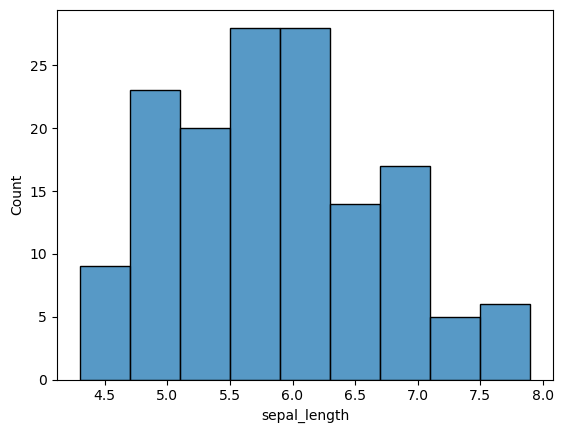

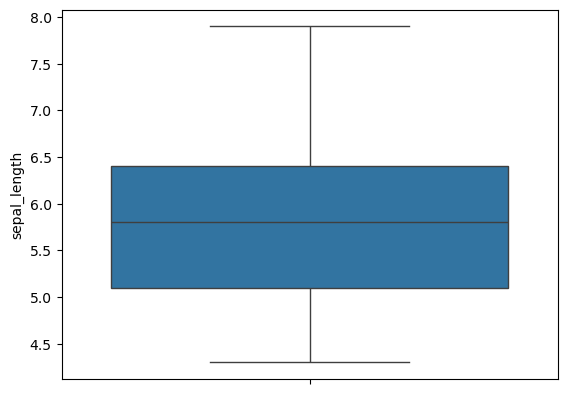

======================================== sepal_width ========================================


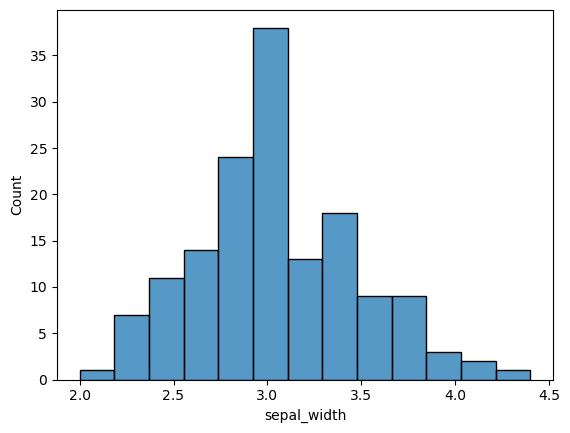

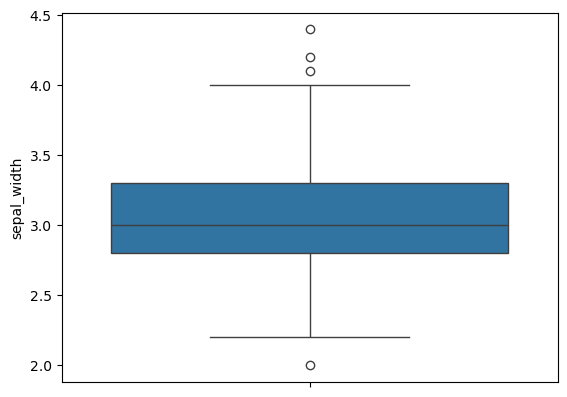

======================================== petal_length ========================================


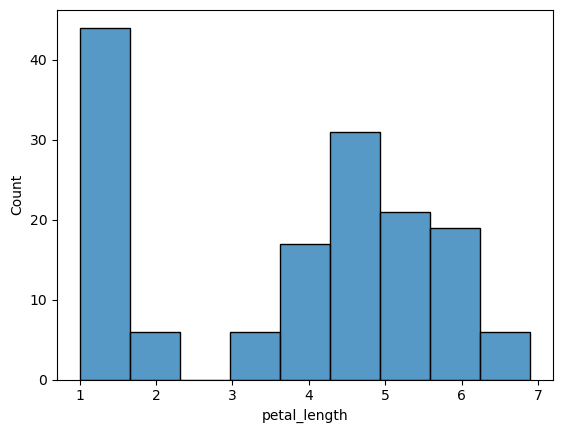

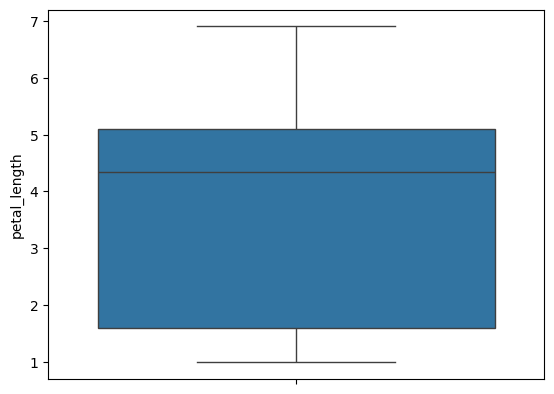

======================================== petal_width ========================================


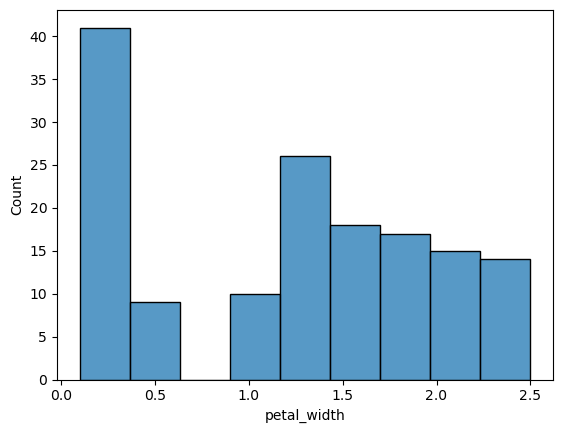

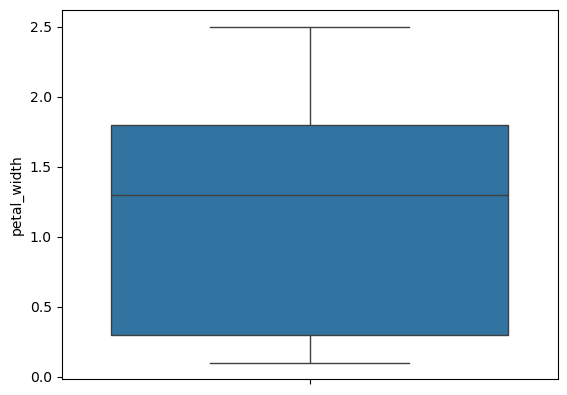

======================================== species ========================================


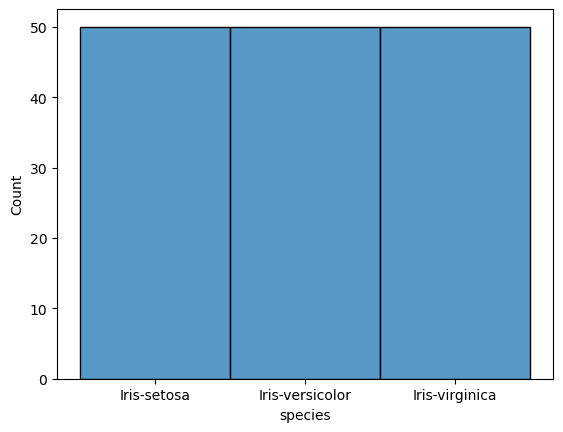

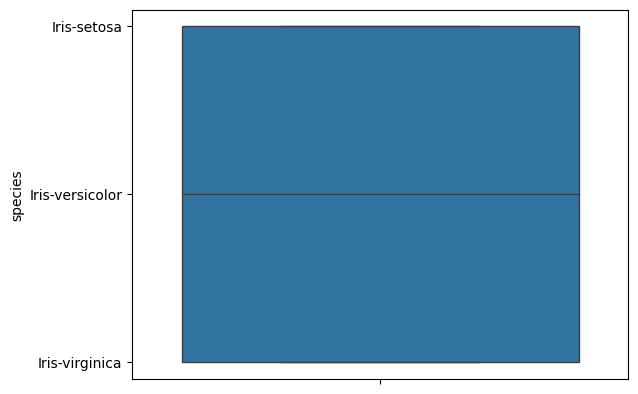

In [5]:
for col in data:
    print("="*40, col, "="*40)
    sns.histplot(data[col])
    plt.show()
    sns.boxplot(data[col])
    plt.show()

In [6]:
X = data.drop("species", axis=1)
y = data['species']

* label 인코딩으로 숫자 변환: sparse_categorical_crossentropy
* one-hot 인코딩으로 변환: categorical_crossentropy

In [7]:
y = pd.get_dummies(y)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [10]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=42)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
mms = MinMaxScaler()
mms.fit(X_train)
mms_X_train = mms.transform(X_train)
mms_X_test = mms.transform(X_test)
mms_X_train = pd.DataFrame(mms_X_train, columns=X_train.columns, index=X_train.index)
mms_X_test = pd.DataFrame(mms_X_test, columns=X_test.columns, index=X_test.index)

# 텐서프로우로 다중분류

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import classification_report

In [23]:
model =  Sequential()
model.add(Input(shape=(mms_X_train.shape[1], )))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax')) # 다중분류시에는 출력층의 클래스 수 만큼 node를 주어야 함, 활성함수는 softmax
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267 (1.04 KB)

 Trainable params: 267 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


2025-12-03 11:06:36.621488: I external/local_xla/xla/service/service.cc:163] XLA service 0x71597c00c400 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-03 11:06:36.621548: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-12-03 11:06:36.661979: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-03 11:06:36.917289: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600


1/5 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.6562 - loss: 1.0982

I0000 00:00:1764727600.420013    1676 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 973ms/step - accuracy: 0.5714 - loss: 1.0978 - val_accuracy: 0.6000 - val_loss: 1.0947
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5786 - loss: 1.0947 - val_accuracy: 0.6000 - val_loss: 1.0935
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5929 - loss: 1.0903 - val_accuracy: 0.6000 - val_loss: 1.0893
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6143 - loss: 1.0856 - val_accuracy: 0.8000 - val_loss: 1.0843
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6571 - loss: 1.0804 - val_accuracy: 0.8000 - val_loss: 1.0771
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6500 - loss: 1.0753 - val_accuracy: 0.8000 - val_loss: 1.0701
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6571 - loss: 1.0699 - val_accuracy: 0.8000 - val_loss: 1.0640
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6571 - loss: 1.0638 - val_accuracy: 0.8000 - val_loss: 1.0575
Epo

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6857 - loss: 0.4843 - val_accuracy: 0.4000 - val_loss: 0.6428
Epoch 53/100
5/5 ━━━━━━━━━━━━━━━━━━━━ -2s -592225us/step - accuracy: 0.6857 - loss: 0.4809 - val_accuracy: 0.4000 - val_loss: 0.6426
Epoch 54/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6857 - loss: 0.4776 - val_accuracy: 0.4000 - val_loss: 0.6427
Epoch 55/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6857 - loss: 0.4752 - val_accuracy: 0.4000 - val_loss: 0.6445
Epoch 56/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6857 - loss: 0.4725 - val_accuracy: 0.4000 - val_loss: 0.6441
Epoch 57/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6857 - loss: 0.4702 - val_accuracy: 0.4000 - val_loss: 0.6407
Epoch 58/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6857 - loss: 0.4681 - val_accuracy: 0.4000 - val_loss: 0.6379
Epoch 59/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6857 - loss: 0.4664 - val_accuracy: 0.4000 - val_loss

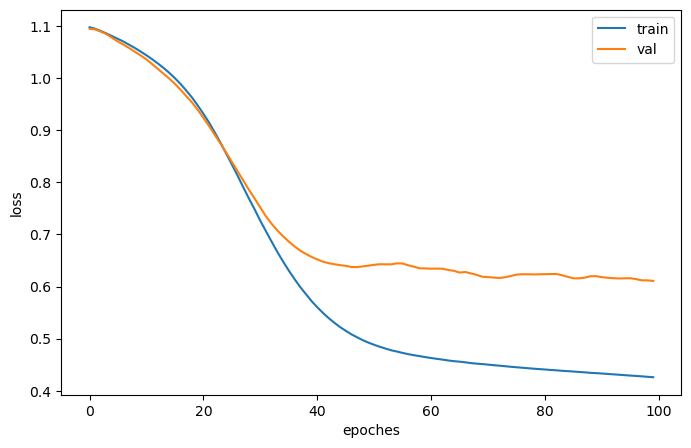

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=32, validation_data=(mms_X_test, y_test))
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
pred = model.predict(mms_X_test)
pred = pd.DataFrame(pred)
pred = pred3[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test, pred))